# Домашнее задание №3

In [112]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics

%matplotlib inline

Таблица Indian liver pations records.

Загрузить датасет https://www.kaggle.com/uciml/indian-liver-patient-records. 

In [74]:
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Dataset: пациент с болезнью печени - 1,
         пациент не болеет - 2

Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin, предварительно разделив данные на 80% тренировочных и 20% тестовых. Построить график: исходных тренировочных и тестовых данных, а также прямой линейной регрессии.

#Задание1

In [154]:
#коэффициент корреляции
from scipy.stats import pearsonr

In [155]:
pearsonr(data['Direct_Bilirubin'],data['Total_Bilirubin'] )
#сильная положительная зависимость

(0.9798243666568013, 0.0)

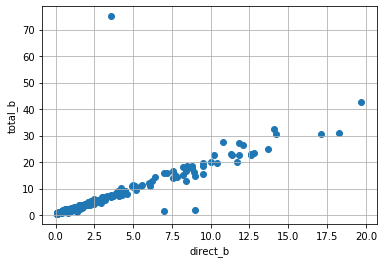

In [75]:
#визуально определяю выбросы
direct_b = data['Direct_Bilirubin']
total_b = data['Total_Bilirubin']
fig, ax = plt.subplots()
ax.scatter(direct_b, total_b)

ax.grid(True)
plt.xlabel('direct_b')
plt.ylabel('total_b')
plt.show()

In [80]:
#исключаю выброс
data=data.loc[data['Total_Bilirubin']!= 75, :]

In [81]:
direct_b = np.array(data['Direct_Bilirubin']).reshape(-1,1)
total_b = np.array(data['Total_Bilirubin']).reshape(-1,1)

In [82]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [83]:
#разделение
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    direct_b,
    total_b,
    test_size = 0.2
)

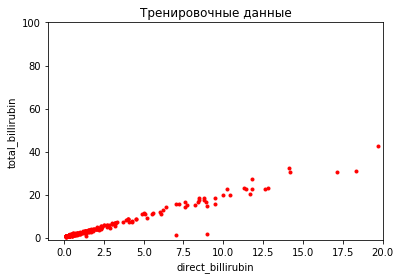

In [84]:
#исходные данные тренировочные
plt.xlabel('direct_billirubin')
plt.ylabel('total_billirubin')
plt.title('Тренировочные данные')
plt.plot(X_train, y_train, 'r.')
plt.xlim(-1,20)
plt.ylim(-1,100)
plt.show()

In [85]:
#обучение
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
#предсказания
predicted_y = model.predict(X_test)

In [87]:
#ошибка
model.score(X_test, y_test)

0.9727490058087742

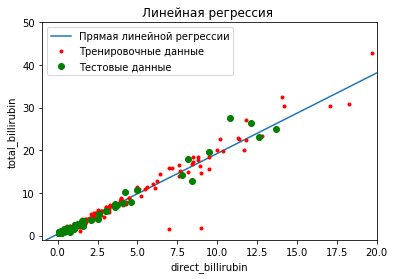

In [91]:
#график линейной регрессии
plt.xlabel('direct_billirubin')
plt.ylabel('total_billirubin')
plt.title('Линейная регрессия ')
x = np.linspace(-1, 20, 50)
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.xlim(-1,20)
plt.ylim(-1,50)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

In [96]:
age = data['Age']

Пример, как считать квантили:

In [97]:
print("Q2 квантиль ряда : ", np.quantile(age, .50)) 
print("Q1 квантиль ряда : ", np.quantile(age, .25)) 
print("Q3 квантиль ряда : ", np.quantile(age, .75)) 
print("10 квантиль ряда : ", np.quantile(age, .1)) 

Q2 квантиль ряда :  45.0
Q1 квантиль ряда :  33.0
Q3 квантиль ряда :  58.0
10 квантиль ряда :  23.0


Примеры квантилей 10%, 25%, 50%, 75% для всех колонок таблицы data

In [157]:
data.quantile([.10, .25, .50, .75], axis = 0) 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.10,23.0,0.7,0.1,150.00,18.00,19.0,5.1,2.0,0.544,1.0
0.25,33.0,0.8,0.2,175.25,23.00,25.0,5.8,2.6,0.700,1.0
0.50,45.0,1.0,0.3,208.00,35.00,42.0,6.6,3.1,0.940,1.0
0.75,58.0,2.6,1.3,298.00,60.75,87.0,7.2,3.8,1.100,2.0


Пример квартилей:

In [94]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,578.000000,582.000000
mean,44.728522,3.175601,1.482474,290.505155,80.783505,109.986254,6.483677,3.142955,0.947664,1.286942
std,16.198165,5.455335,2.809543,243.140884,182.769631,289.161313,1.086322,0.795757,0.319542,0.452723
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.250000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.940000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.750000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,42.800000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Посчитать квартили для всех колонок. 

In [158]:
#Квартили для всех колонок
data.quantile([.25, .50, .75], axis = 0) 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.25,33.0,0.8,0.2,175.25,23.00,25.0,5.8,2.6,0.70,1.0
0.50,45.0,1.0,0.3,208.00,35.00,42.0,6.6,3.1,0.94,1.0
0.75,58.0,2.6,1.3,298.00,60.75,87.0,7.2,3.8,1.10,2.0


Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

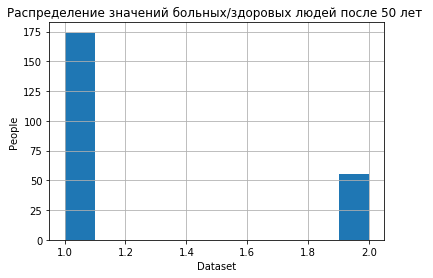

In [171]:
age_up_50 = data[data['Age']>=50]['Dataset']
plt.hist(age_up_50, 10)
plt.xlabel('Dataset')
plt.ylabel('People')
plt.title('Распределение значений больных/здоровых людей после 50 лет ')
plt.grid(True)
plt.show()

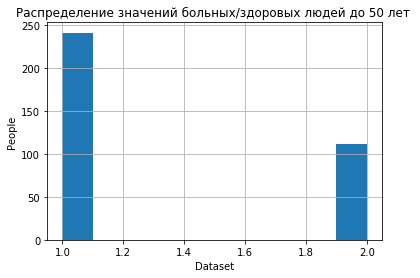

In [172]:
age_do_50 = data[data['Age']<50]['Dataset']
plt.hist(age_do_50, 10)
plt.xlabel('Dataset')
plt.ylabel('People')
plt.title('Распределение значений больных/здоровых людей до 50 лет ')
plt.grid(True)
plt.show()

In [173]:
print (statistics.mean(data[data['Age']<50].loc[data['Dataset']==1]['Age']), 'Средний возраст среди больных людей до 50')
print (statistics.mean(data[data['Age']>50].loc[data['Dataset']==1]['Age']), 'Средний возраст среди больных людей после 50')

35.356846473029044 Средний возраст среди больных людей до 50
62.254777070063696 Средний возраст среди больных людей после 50


In [178]:
print (statistics.median(data[data['Age']<50].loc[data['Dataset']==1]['Age']), 'Медиана, среди больных людей до 50')
print (statistics.median(data[data['Age']>50].loc[data['Dataset']==1]['Age']), 'Медиана, среди больных людей после 50')

37 Медиана, среди больных людей до 50
60 Медиана, среди больных людей после 50


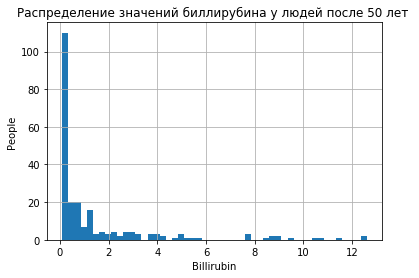

In [191]:
# по показателю Direct_billirubin
age_up_50 = data[data['Age']>=50]['Direct_Bilirubin']
plt.hist(age_up_50, 50)
plt.xlabel('Billirubin')
plt.ylabel('People')
plt.title('Распределение значений биллирубина у людей после 50 лет ')
plt.grid(True)
plt.show()

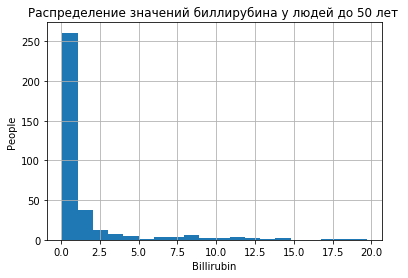

In [190]:
age_do_50 = data[data['Age']<50]['Direct_Bilirubin']
plt.hist(age_do_50, 20)
plt.xlabel('Billirubin')
plt.ylabel('People')
plt.title('Распределение значений биллирубина у людей до 50 лет ')
plt.grid(True)
plt.show()

In [176]:
print (statistics.mean(age_do_50), 'Среднее значение биллирубина среди  людей до 50')
print (statistics.mean(age_up_50), 'Средний значение биллирубина среди  людей после 50')


1.4946175637393768 Среднее значение биллирубина среди  людей до 50
1.4637554585152839 Средний значение биллирубина среди  людей после 50


In [177]:
#квартиль 0.5
print (statistics.median(age_do_50), 'Медиана, люди до 50')
print (statistics.median(age_up_50), 'Медиана, люди после 50')

0.3 Медиана, люди до 50
0.4 Медиана, люди после 50


Среднее значение незначительно выше в выборке людей до 50, при этом медиана чуть правее у более возрастной группы.
Похоже на то,что у людей из этой ген.совокупности в течение жизни среднее значение direct_billirubin практически не меняется.

Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

In [137]:
#Нулевая гипотеза - среднее значение выборки равно среднему значению генеральной совокупности.
totall_b_ill = data[data['Dataset']==1]['Total_Bilirubin']
stats.ttest_1samp(totall_b_ill, data['Total_Bilirubin'].mean())
# Поскольку pvalue=0.007 меньше alpha = 0.05, гипотезу отклоняем, выборка не похожа на ген совокупность

Ttest_1sampResult(statistic=2.6680227101132354, pvalue=0.00792947118580456)

In [192]:
print(len(totall_b_ill), 'Всего больных(степень свободы)')

415 Всего больных(степень свободы)


#либо 2  способ
наше значение t-value 2.66 больше, чем значение по таблице критических значений Стьюдента 1,967, гипотезу отвергаем

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [141]:
totall_b_ill = data[data['Dataset']==1]['Total_Bilirubin']
totall_b_healhy = data[data['Dataset']==2]['Total_Bilirubin']

print(stats.ttest_ind(totall_b_ill, totall_b_healhy))
#Высокий показатель t-value=5.8 и низкий показатель p-value=0 говорит о том, что группы статистически отличаются

Ttest_indResult(statistic=5.8649857449009275, pvalue=7.548849823227222e-09)


Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [150]:
dataset_young = data[data['Age']<30]['Dataset']

dataset_middle = data[(data['Age']>=30) & (data['Age'] <=55)]['Dataset']

dataset_old = data[data['Age']>55]['Dataset']

stats.f_oneway(restecg_0, restecg_1, restecg_2)

F_onewayResult(statistic=9.374152826309006, pvalue=9.848742562445969e-05)

In [ ]:
# Так как результат p-value меньше 0.05, то мы отвергаем нулевую гипотезу о том, что в выборке Dataset нет различий у групп с разным возрастом

In [ ]:
dataset_young = data[data['Age']<30]['Dataset']

dataset_middle = data[(data['Age']>=30) & (data['Age'] <=55)]['Dataset']

dataset_old = data[data['Age']>55]['Dataset']

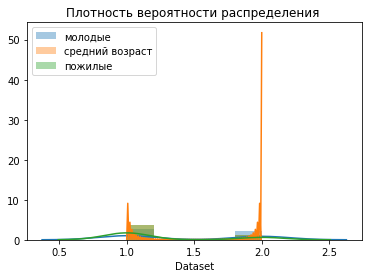

In [152]:
sns.distplot(dataset_young, 5)
sns.distplot(dataset_middle, 5)
sns.distplot(dataset_old, 5)
plt.title('Плотность вероятности распределения ')
plt.legend(['молодые', 'средний возраст', 'пожилые'])
plt.show()

Вопросы задавать на почту yustiks@gmail.com